In [24]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.layers import Layer, Conv2D, Activation, Concatenate, BatchNormalization
# from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, Multiply
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, MaxPooling2D, Flatten, Dropout
# from tensorflow.keras.optimizers import Adam
# import tensorflow as tf
# import numpy as np

# # Define the ChannelAttention layer
# class ChannelAttention(Layer):
#     def __init__(self, in_channels, reduction_ratio=16, **kwargs):
#         super(ChannelAttention, self).__init__(**kwargs)
#         self.avg_pool = GlobalAveragePooling2D()
#         self.max_pool = GlobalMaxPooling2D()
#         self.fc1 = Dense(in_channels // reduction_ratio, activation='relu', use_bias=False)
#         self.fc2 = Dense(in_channels, use_bias=False)
#         self.sigmoid = Activation('sigmoid')

#     def call(self, inputs):
#         avg_pooled = self.avg_pool(inputs)
#         max_pooled = self.max_pool(inputs)
#         avg_pooled = Reshape((1, 1, avg_pooled.shape[-1]))(avg_pooled)
#         max_pooled = Reshape((1, 1, max_pooled.shape[-1]))(max_pooled)
#         out = self.fc1(avg_pooled + max_pooled)
#         out = self.fc2(out)
#         scale = self.sigmoid(out)
#         return inputs * scale

# # Define the SpatialAttention layer
# class SpatialAttention(Layer):
#     def __init__(self, kernel_size=7, **kwargs):
#         super(SpatialAttention, self).__init__(**kwargs)
#         self.conv = Conv2D(1, kernel_size, padding='same', use_bias=False, activation='sigmoid')

#     def call(self, inputs):
#         max_out = tf.reduce_max(inputs, axis=3, keepdims=True)
#         avg_out = tf.reduce_mean(inputs, axis=3, keepdims=True)
#         out = tf.concat([max_out, avg_out], axis=3)
#         out = self.conv(out)
#         return inputs * out

# # Model architecture
# MainInput = Input(shape=(299, 299, 3))
# conv = Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same", kernel_initializer='he_normal')(MainInput)
# conv = BatchNormalization()(conv)
# conv = Conv2D(filters=64, kernel_size=(1,1), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
# conv = BatchNormalization()(conv)
# conv = MaxPooling2D(strides=(2, 2), padding="same")(conv)

# conv = Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
# conv = BatchNormalization()(conv)
# conv = Conv2D(filters=128, kernel_size=(1,1), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
# conv = BatchNormalization()(conv)
# conv = MaxPooling2D()(conv)

# conv = Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
# conv = BatchNormalization()(conv)
# conv = Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
# conv = BatchNormalization()(conv)
# conv = Conv2D(filters=256, kernel_size=(1,1), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
# conv = BatchNormalization()(conv)
# conv = MaxPooling2D()(conv)

# # Apply Channel and Spatial Attention before the final block of convolution layers
# channel_attention = ChannelAttention(in_channels=256, name='channel_attention')(conv)
# spatial_attention = SpatialAttention(name='spatial_attention')(channel_attention)

# conv = Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same", kernel_initializer='he_normal')(spatial_attention)
# conv = BatchNormalization()(conv)
# conv = Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
# conv = BatchNormalization()(conv)
# conv = Conv2D(filters=512, kernel_size=(1,1), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
# conv = BatchNormalization()(conv)
# conv = MaxPooling2D(pool_size=(2, 2), padding="same")(conv)

# conv = Dropout(0.5)(conv)
# conv = GlobalAveragePooling2D()(conv)
# conv = Dense(1024, activation="relu")(conv)
# conv = Dense(1024, activation="relu")(conv)
# convs= Dense(7, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01))(conv)

# # Create and compile the model
# model = Model(inputs=MainInput, outputs=convs)
# model.summary()

# # Load datasets
# train_path = 'C:/Users/RTX3060/Desktop/paper1/HAM-10000/train_dirVv15/'
# test_path = 'C:/Users/RTX3060/Desktop/paper1/HAM-10000/test_dirVc15/'

# train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)
# test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)

# train_generator = train_datagen.flow_from_directory(train_path, target_size=(299, 299), batch_size=16, class_mode='categorical')
# test_generator = test_datagen.flow_from_directory(test_path, target_size=(299, 299), batch_size=16, class_mode='categorical')

# # Print the sizes of the datasets
# print(f"Training dataset size: {train_generator.samples} images")
# print(f"Test dataset size: {test_generator.samples} images")

# # Function to get layer outputs
# def get_layer_outputs(model, inputs):
#     layer_outputs = []
#     for layer in model.layers:
#         intermediate_model = Model(inputs=model.input, outputs=layer.output)
#         intermediate_output = intermediate_model.predict(inputs)
#         layer_outputs.append((layer.name, intermediate_output))
#     return layer_outputs

# # Generate some data from the train generator to test
# input_data, _ = next(train_generator)

# # Get the layer outputs
# layer_outputs = get_layer_outputs(model, input_data)

# # Print the shape of each layer's output
# for layer_name, output in layer_outputs:
#     print(f"Layer: {layer_name}, Output shape: {output.shape}")


In [25]:
# import os

# # Define the paths to your training and test directories
# train_path = 'C:/Users/RTX3060/Desktop/paper1/HAM-10000/train_dirVc15/'
# test_path = 'C:/Users/RTX3060/Desktop/paper1/HAM-10000/test_dirVc15/'

# def count_files(directory):
#     count = 0
#     for root, dirs, files in os.walk(directory):
#         count += len(files)
#     return count

# # Count the files in the training and test directories
# train_size = count_files(train_path)
# test_size = count_files(test_path)

# # Print the sizes of the datasets
# print(f'Training dataset size: {train_size} images')
# print(f'Test dataset size: {test_size} images')


In [3]:

import os
# Replace this path with the path to your dataset folder
filename = "C:\\Users\\RTX3060\\Desktop\\paper1\\HAM-10000\\HAM10000"
# List the files in the dataset folder
file_list = os.listdir(filename)
# Print the list of files as a check
print("Files in the dataset folder:", file_list)

Files in the dataset folder: ['HAM10000_metadata.csv', 'hmnist_8_8_L.csv', 'ISIC_0024306.jpg', 'ISIC_0024307.jpg', 'ISIC_0024308.jpg', 'ISIC_0024309.jpg', 'ISIC_0024310.jpg', 'ISIC_0024311.jpg', 'ISIC_0024312.jpg', 'ISIC_0024313.jpg', 'ISIC_0024314.jpg', 'ISIC_0024315.jpg', 'ISIC_0024316.jpg', 'ISIC_0024317.jpg', 'ISIC_0024318.jpg', 'ISIC_0024319.jpg', 'ISIC_0024320.jpg', 'ISIC_0024321.jpg', 'ISIC_0024322.jpg', 'ISIC_0024323.jpg', 'ISIC_0024324.jpg', 'ISIC_0024325.jpg', 'ISIC_0024326.jpg', 'ISIC_0024327.jpg', 'ISIC_0024328.jpg', 'ISIC_0024329.jpg', 'ISIC_0024330.jpg', 'ISIC_0024331.jpg', 'ISIC_0024332.jpg', 'ISIC_0024333.jpg', 'ISIC_0024334.jpg', 'ISIC_0024335.jpg', 'ISIC_0024336.jpg', 'ISIC_0024337.jpg', 'ISIC_0024338.jpg', 'ISIC_0024339.jpg', 'ISIC_0024340.jpg', 'ISIC_0024341.jpg', 'ISIC_0024342.jpg', 'ISIC_0024343.jpg', 'ISIC_0024344.jpg', 'ISIC_0024345.jpg', 'ISIC_0024346.jpg', 'ISIC_0024347.jpg', 'ISIC_0024348.jpg', 'ISIC_0024349.jpg', 'ISIC_0024350.jpg', 'ISIC_0024351.jpg', 'ISIC

In [4]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from keras import backend as K
from keras.layers import Layer,InputSpec
import keras.layers as kl
from glob import glob
from sklearn.metrics import roc_curve, auc
from keras.preprocessing import image
from tensorflow.keras.models import Sequential # type: ignore
from sklearn.metrics import roc_auc_score
from tensorflow.keras import callbacks  # type: ignore
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping # type: ignore
from  matplotlib import pyplot as plt
from tensorflow.keras import Model # type: ignore
from tensorflow.keras.layers import concatenate,Dense, Conv2D, MaxPooling2D, Flatten,Input,Activation,add,AveragePooling2D,BatchNormalization,Dropout # type: ignore
%matplotlib inline
import shutil
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from tensorflow.python.platform import build_info as tf_build_info
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
data_pd = pd.read_csv('C:\\Users\\RTX3060\\Desktop\\paper1\\HAM-10000\\HAM10000\\HAM10000_metadata.csv')
data_pd.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
train_dir = os.path.join('HAM10000', 'train_dir')
test_dir = os.path.join('HAM10000', 'test_dir')

In [7]:
df_count = data_pd.groupby('lesion_id').count()
df_count.head()

,image_id,dx,dx_type,age,sex,localization
lesion_id,,,,,,
HAM_0000000,2,2,2,2,2,2
HAM_0000001,1,1,1,1,1,1
HAM_0000002,3,3,3,3,3,3
HAM_0000003,1,1,1,1,1,1
HAM_0000004,1,1,1,1,1,1


In [8]:
df_count = df_count[df_count['dx'] == 1]
df_count.reset_index(inplace=True)

In [9]:
def duplicates(x):
    unique = set(df_count['lesion_id'])
    if x in unique:
        return 'no' 
    else:
        return 'duplicates'

In [10]:
data_pd['is_duplicate'] = data_pd['lesion_id'].apply(duplicates)
data_pd.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,is_duplicate
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,duplicates


In [11]:
df_count = data_pd[data_pd['is_duplicate'] == 'no']

In [12]:
train, test_df = train_test_split(df_count, test_size=0.15, stratify=df_count['dx'])

In [13]:
def identify_trainOrtest(x):
    test_data = set(test_df['image_id'])
    if str(x) in test_data:
        return 'test'
    else:
        return 'train'

#creating train_df
data_pd['train_test_split'] = data_pd['image_id'].apply(identify_trainOrtest)
train_df = data_pd[data_pd['train_test_split'] == 'train']
train_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,is_duplicate,train_test_split
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,duplicates,train
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,duplicates,train
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,duplicates,train
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,duplicates,train
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,duplicates,train


In [14]:
test_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,is_duplicate
5156,HAM_0002593,ISIC_0029935,nv,follow_up,50.0,female,hand,no
6426,HAM_0005716,ISIC_0031841,nv,follow_up,50.0,male,back,no
3703,HAM_0004537,ISIC_0026361,nv,follow_up,60.0,male,abdomen,no
3385,HAM_0000339,ISIC_0025044,nv,follow_up,40.0,female,abdomen,no
3066,HAM_0005858,ISIC_0028879,nv,follow_up,55.0,male,back,no


In [15]:
# Image id of train and test images
train_list = list(train_df['image_id'])
test_list = list(test_df['image_id'])

In [16]:
len(test_list)

828

In [17]:
len(train_list)

9187

In [18]:
# Set the image_id as the index in data_pd
data_pd.set_index('image_id', inplace=True)

In [19]:
#train_dir = os.getcwd()
import os

# Example directory paths
base_dir = "C:\\Users\\RTX3060\\Desktop\\paper1\\HAM-10000"
train_dirVc15 = os.path.join(base_dir, "train_dirVc15")
test_dirVc15 = os.path.join(base_dir, "test_dirVc15")

# Create the parent directories if they don't exist
os.makedirs(train_dirVc15, exist_ok=True)
os.makedirs(test_dirVc15, exist_ok=True)



In [20]:
targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [21]:
for i in targetnames:
  directory1=train_dirVc15+'/'+i
  directory2=test_dirVc15+'/'+i
  os.mkdir(directory1)
  os.mkdir(directory2)

In [22]:

import os
import shutil

for image in train_list:
    source_dir = r"C:\\Users\\RTX3060\\Desktop\\paper1\\HAM-10000\\HAM10000"
    train_dir = r"C:\\Users\\RTX3060\\Desktop\\paper1\\HAM-10000\\train_dirVc15"

    # getting the file name and label
    file_name = image+".jpg"
    label = data_pd.loc[image, 'dx']
    # creating the source and target paths using os.path.join
    source = os.path.join(source_dir, file_name)
    target = os.path.join(train_dir, label, file_name)

    # copying the file from the source to the target folder
    shutil.copyfile(source, target)
   


KeyboardInterrupt: 

In [ ]:

import os
import shutil

for image in test_list:
    source_dir = r"C:\\Users\\RTX3060\\Desktop\\paper1\\HAM-10000\\HAM10000"
    test_dir = r"C:\\Users\\RTX3060\\Desktop\\paper1\\HAM-10000\\test_dirVc15"

    # getting the file name and label
    file_name = image+".jpg"
    label = data_pd.loc[image, 'dx']

    # creating the source and target paths using os.path.join
    source = os.path.join(source_dir, file_name)
    target = os.path.join(test_dir, label, file_name)

    # copying the file from the source to the target folder
    shutil.copyfile(source, target)

In [ ]:
targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# Augmenting images and storing them in temporary directories 
for img_class in targetnames:

    #creating temporary directories
    # creating a base directory
    aug_dir3 = 'aug_dir3'
    os.mkdir(aug_dir3)
    # creating a subdirectory inside the base directory for images of the same class
    img_dir = os.path.join(aug_dir3, 'img_dir')
    os.mkdir(img_dir)

    img_list = os.listdir('C:\\Users\\RTX3060\\Desktop\\paper1\\HAM-10000\\train_dirVc15\\' + img_class)

    # Copy images from the class train dir to the img_dir 
    for file_name in img_list:

        # path of source image in training directory
        source = os.path.join('C:\\Users\\RTX3060\\Desktop\\paper1\\HAM-10000\\train_dirVc15\\' + img_class, file_name)

        # creating a target directory to send images 
        target = os.path.join(img_dir, file_name)

        # copying the image from the source to target file
        shutil.copyfile(source, target)

    # Temporary augumented dataset directory.
    source_path = aug_dir3

    # Augmented images will be saved to training directory
    save_path = 'C:\\Users\\RTX3060\\Desktop\\paper1\\HAM-10000\\train_dirVc15\\' + img_class

    # Creating Image Data Generator to augment images
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(

        rotation_range=180,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest',
        brightness_range=[0.8, 1.2],
        rescale=1./255

   
    )

    batch_size = 30

    aug_datagen = datagen.flow_from_directory(source_path,save_to_dir=save_path,save_format='jpg',target_size=(299, 299),batch_size=batch_size)

    # Generate the augmented images
    aug_images = 8000 

    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((aug_images - num_files) / batch_size))

    # creating 8000 augmented images per class
    for i in range(0, num_batches):
        images, labels = next(aug_datagen)

    # delete temporary directory 
    shutil.rmtree('aug_dir3')



Found 304 images belonging to 1 classes.
Found 488 images belonging to 1 classes.
Found 1033 images belonging to 1 classes.
Found 109 images belonging to 1 classes.
Found 1079 images belonging to 1 classes.
Found 6042 images belonging to 1 classes.
Found 132 images belonging to 1 classes.


In [ ]:
train_path = 'C:/Users/RTX3060/Desktop/paper1/HAM-10000/train_dirVc15/'
test_path = 'C:/Users/RTX3060/Desktop/paper1/HAM-10000/test_dirVc15/'
batch_size = 16

In [ ]:
datagen=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [ ]:
image_size = 224
print("\nTrain Batches: ")
train_batches = datagen.flow_from_directory(directory=train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=batch_size,
                                            shuffle=True)

print("\nTest Batches: ")
test_batches =datagen.flow_from_directory(test_path,
                                           target_size=(image_size,image_size),
                                           batch_size=batch_size,
                                           shuffle=False)


Train Batches: 
Found 53461 images belonging to 7 classes.

Test Batches: 
Found 828 images belonging to 7 classes.


In [23]:

import tensorflow as tf
from tensorflow.keras.layers import Layer, Conv2D, Activation, GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, Dropout, BatchNormalization, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

class ChannelAttention(Layer):
    def __init__(self, in_channels, reduction_ratio=16, **kwargs):
        super(ChannelAttention, self).__init__(**kwargs)
        self.avg_pool = GlobalAveragePooling2D()
        self.max_pool = GlobalMaxPooling2D()
        self.fc1 = Dense(in_channels // reduction_ratio, activation='relu', use_bias=False)
        self.fc2 = Dense(in_channels, use_bias=False)
        self.sigmoid = Activation('sigmoid')

    def call(self, inputs):
        avg_pooled = self.avg_pool(inputs)
        max_pooled = self.max_pool(inputs)
        avg_pooled = Reshape((1, 1, avg_pooled.shape[-1]))(avg_pooled)
        max_pooled = Reshape((1, 1, max_pooled.shape[-1]))(max_pooled)
        out = self.fc1(avg_pooled + max_pooled)
        out = self.fc2(out)
        scale = self.sigmoid(out)
        return inputs * scale

class SpatialAttention(Layer):
    def __init__(self, kernel_size=7, **kwargs):
        super(SpatialAttention, self).__init__(**kwargs)
        self.conv = Conv2D(1, kernel_size, padding='same', use_bias=False, activation='sigmoid')

    def call(self, inputs):
        max_out = tf.reduce_max(inputs, axis=3, keepdims=True)
        avg_out = tf.reduce_mean(inputs, axis=3, keepdims=True)
        out = tf.concat([max_out, avg_out], axis=3)
        out = self.conv(out)
        return inputs * out

# Model architecture
MainInput = Input(shape=(224, 224, 3))
conv = Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same", kernel_initializer='he_normal')(MainInput)
conv = Conv2D(filters=64, kernel_size=(1,1), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
conv = MaxPooling2D(strides=(2, 2), padding="same")(conv)

conv = Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
conv = BatchNormalization()(conv)
conv = Conv2D(filters=128, kernel_size=(1,1), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
conv = BatchNormalization()(conv)
conv = MaxPooling2D()(conv)

conv = Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
conv = BatchNormalization()(conv)
conv = Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
conv = BatchNormalization()(conv)
conv = Conv2D(filters=256, kernel_size=(1,1), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
conv = BatchNormalization()(conv)
conv = MaxPooling2D()(conv)

conv = Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
conv = BatchNormalization()(conv)
conv = Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
conv = BatchNormalization()(conv)
conv = Conv2D(filters=512, kernel_size=(1,1), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
conv = BatchNormalization()(conv)
conv = MaxPooling2D()(conv)


# Move the CBAM block here (after the 5th block)
conv = Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
conv = BatchNormalization()(conv)
conv = Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
conv = BatchNormalization()(conv)
conv = Conv2D(filters=512, kernel_size=(1,1), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
conv = BatchNormalization()(conv)
conv = MaxPooling2D(pool_size=(2, 2), padding="same")(conv)

# Integrate Channel and Spatial Attention here (after 5th block)
channel_attention = ChannelAttention(in_channels=512, name='channel_attention')(conv)
spatial_attention = SpatialAttention(name='spatial_attention')(channel_attention)

conv = Dropout(0.5)(spatial_attention)
conv = GlobalAveragePooling2D()(conv)
conv = Dense(1024, activation="relu")(conv)
conv = Dense(1024, activation="relu")(conv)
convs = Dense(7, activation='softmax', kernel_regularizer=l2(0.01))(conv)

# Create and compile the model
model = Model(inputs=MainInput, outputs=convs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()






 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      4160      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 128)    512       
 ormalization)                                               

Soft Attention

In [24]:
from keras_flops import get_flops

# Compute FLOPs for the model
flops = get_flops(model, batch_size=1)

# Convert to GFLOPs
print(f"FLOPs: {flops}")
print(f"GFLOPs: {flops / 1e9}")


Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
FLOPs: 16755196797
GFLOPs: 16.755196797


In [ ]:
opt1=tf.keras.optimizers.Adam(learning_rate=0.002,epsilon=0.1)
model.compile(optimizer=opt1,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
class_weights = {   
                    0: 1.0,  # akiec
                    1: 1.0,  # bcc
                    2: 1.0,  # bkl
                    3: 1.0,  # df
                    4: 5.0,  # mel
                    5: 1.0,  # nv
                    6: 1.0,  # vasc
                }


checkpoint= ModelCheckpoint(filepath ='VGG16++CBAM.hdf5',monitor='val_accuracy',save_best_only=True,save_weights_only=True)




In [ ]:
Earlystop = EarlyStopping(monitor='val_loss', mode='min',patience=25, min_delta=0.001)
history = model.fit(train_batches,
                    steps_per_epoch=(len(train_df)/10),
                    epochs=180,
                    verbose=2,
                    validation_data=test_batches,validation_steps=len(test_df)/batch_size,callbacks=[checkpoint,Earlystop],class_weight=class_weights)

Epoch 1/180
918/918 - 176s - loss: 2.0900 - accuracy: 0.3655 - val_loss: 1.8567 - val_accuracy: 0.2850 - 176s/epoch - 192ms/step
Epoch 2/180
918/918 - 155s - loss: 1.7680 - accuracy: 0.4663 - val_loss: 0.7355 - val_accuracy: 0.7657 - 155s/epoch - 169ms/step
Epoch 3/180
918/918 - 155s - loss: 1.5823 - accuracy: 0.5178 - val_loss: 1.1374 - val_accuracy: 0.6039 - 155s/epoch - 168ms/step
Epoch 4/180
918/918 - 156s - loss: 1.4626 - accuracy: 0.5575 - val_loss: 1.3814 - val_accuracy: 0.5133 - 156s/epoch - 170ms/step
Epoch 5/180
918/918 - 156s - loss: 1.3509 - accuracy: 0.5915 - val_loss: 0.6432 - val_accuracy: 0.8068 - 156s/epoch - 170ms/step
Epoch 6/180
918/918 - 155s - loss: 1.2995 - accuracy: 0.6092 - val_loss: 0.6512 - val_accuracy: 0.7874 - 155s/epoch - 169ms/step
Epoch 7/180
918/918 - 155s - loss: 1.2337 - accuracy: 0.6311 - val_loss: 0.6197 - val_accuracy: 0.8128 - 155s/epoch - 169ms/step
Epoch 8/180
918/918 - 155s - loss: 1.1772 - accuracy: 0.6502 - val_loss: 0.6435 - val_accuracy: 0

In [ ]:
from tensorflow.keras import models # type: ignore
model.load_weights("VGG16++CBAM.hdf5")

In [ ]:
predictions = model.predict(test_batches, steps=len(test_df)/batch_size, verbose=0)

In [ ]:
#geting predictions on test dataset
y_pred = np.argmax(predictions, axis=1)
targetnames = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
#getting the true labels per image 
y_true = test_batches.classes
#getting the predicted labels per image 
y_prob=predictions
from tensorflow.keras.utils import to_categorical # type: ignore
y_test = to_categorical(y_true)

# Creating classification report 
report = classification_report(y_true, y_pred, target_names=targetnames)

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

       akiec       0.61      0.61      0.61        23
         bcc       0.68      0.65      0.67        26
         bkl       0.65      0.71      0.68        66
          df       0.60      0.50      0.55         6
         mel       0.52      0.35      0.42        34
          nv       0.95      0.96      0.96       663
        vasc       1.00      1.00      1.00        10

    accuracy                           0.89       828
   macro avg       0.72      0.68      0.70       828
weighted avg       0.89      0.89      0.89       828



In [ ]:
print("Precision: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("weighted Roc score: " + str(roc_auc_score(y_true,y_prob,multi_class='ovr',average='weighted')))

Precision: 0.8894290336805784
Recall: 0.893719806763285
Accuracy: 0.893719806763285
weighted Roc score: 0.9678997249162291


In [ ]:

print("Precision: "+ str(precision_score(y_true, y_pred, average='macro')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='macro')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("Macro Roc score: " + str(roc_auc_score(y_true,y_prob,multi_class='ovr',average='macro')))

Precision: 0.7162798327204557
Recall: 0.6840555011910511
Accuracy: 0.893719806763285
Macro Roc score: 0.9727592915226857


In [ ]:
print("Precision: "+ str(precision_score(y_true, y_pred, average='micro')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='micro')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
tpr={}
fpr={}
roc_auc={}
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print("Micro Roc score: " + str(roc_auc["micro"]))

Precision: 0.893719806763285
Recall: 0.893719806763285
Accuracy: 0.893719806763285
Micro Roc score: 0.991347036492489


In [ ]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(7):
    r = roc_auc_score(y_test[:, i], y_prob[:, i])
    print("The ROC AUC score of "+targetnames[i]+" is: "+str(r))

The ROC AUC score of akiec is: 0.9710504995949231
The ROC AUC score of bcc is: 0.9799060042202188
The ROC AUC score of bkl is: 0.950349956255468
The ROC AUC score of df is: 0.9831711273317113
The ROC AUC score of mel is: 0.955771225366721
The ROC AUC score of nv is: 0.9690662278897573
The ROC AUC score of vasc is: 1.0


In [ ]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i], drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])

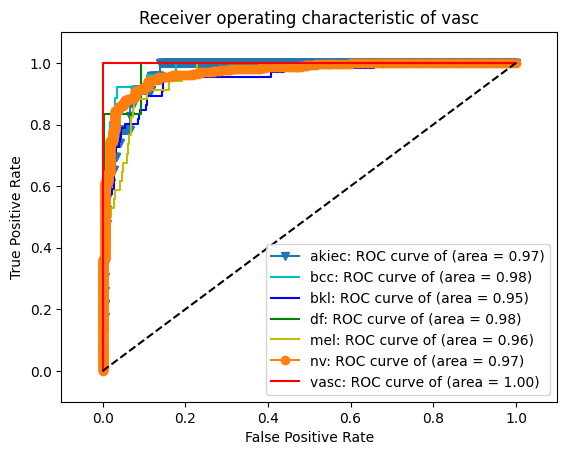

In [ ]:

plt.plot(fpr[0], tpr[0],'v-',label='akiec: ROC curve of (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1],'c',label='bcc: ROC curve of (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2],'b',label='bkl: ROC curve of (area = %0.2f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3],'g',label='df: ROC curve of (area = %0.2f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4],'y',label='mel: ROC curve of (area = %0.2f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5],'o-',label='nv: ROC curve of (area = %0.2f)' % roc_auc[5])
plt.plot(fpr[6], tpr[6],'r',label='vasc: ROC curve of (area = %0.2f)' % roc_auc[6])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of %s'%targetnames[i])
plt.legend(loc="lower right")
plt.show()

In [ ]:
x_test,y_test=next(test_batches)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, accuracy_score
from tensorflow.keras.utils import to_categorical # type: ignore

In [ ]:
# Assuming model is defined and compiled as shown earlier
model.load_weights("Vgg16++CBAM.hdf5")  # Load the best model's weights

# Make predictions
predictions = model.predict(test_batches, steps=len(test_df) / batch_size, verbose=0)
y_pred = np.argmax(predictions, axis=1)

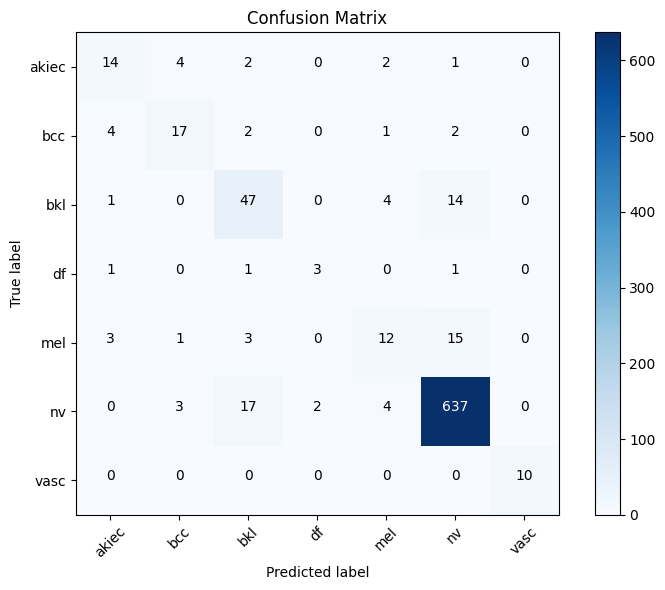

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_true and y_pred are defined correctly
y_true = test_batches.classes  # Ensure this is correctly fetching the labels

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(targetnames))
plt.xticks(tick_marks, targetnames, rotation=45)
plt.yticks(tick_marks, targetnames)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np


cm = confusion_matrix(y_true, y_pred)

# Extracting True Positives, False Positives, False Negatives, and True Negatives
TP = np.diag(cm)  # True Positives are on the diagonal
FP = np.sum(cm, axis=0) - TP  # False Positives are the sum of each column minus TP
FN = np.sum(cm, axis=1) - TP  # False Negatives are the sum of each row minus TP
TN = np.sum(cm) - (FP + FN + TP)  # True Negatives are all other values in the matrix

# Calculating overall specificity
overall_specificity = np.sum(TN) / (np.sum(TN) + np.sum(FP))

# Print Overall Specificity
print(f"Overall Specificity: {overall_specificity:.4f}")

Overall Specificity: 0.9823


In [ ]:
from keras_flops import get_flops

# Compute FLOPs for the model
flops = get_flops(model, batch_size=1)

# Convert to GFLOPs
print(f"FLOPs: {flops}")
print(f"GFLOPs: {flops / 1e9}")


NameError: name 'model' is not defined